In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
reg = pd.read_csv('./Regular_Season_Batter.csv')

In [3]:
reg.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [4]:
reg.info()
# float과 int와 object로 구성된 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [5]:
reg_float = reg[["avg", 'SLG', 'OBP', 'OPS']]

In [6]:
reg_float

,avg,SLG,OBP,OPS
0,0.339,0.519,0.383,0.902
1,0.000,0.000,0.000,0.000
2,0.221,0.349,0.337,0.686
3,0.257,0.325,0.348,0.673
4,0.158,0.257,0.232,0.489
...,...,...,...,...
2449,0.000,0.000,0.000,0.000
2450,0.000,0.000,0.000,0.000
2451,0.000,0.000,0.000,0.000
2452,0.291,0.402,0.359,0.761


In [7]:
reg_float.describe()

,avg,SLG,OBP,OPS
count,2428.000000,2428.000000,2430.000000,2428.000000
mean,0.237559,0.343826,0.306684,0.649939
std,0.098440,0.163335,0.111778,0.261634
min,0.000000,0.000000,0.000000,0.000000
25%,0.203000,0.267454,0.272727,0.546000
50%,0.255000,0.360124,0.328592,0.688637
75%,0.291000,0.436000,0.367000,0.797234
max,1.000000,3.000000,1.000000,4.000000


In [8]:
reg_float.corr()

,avg,SLG,OBP,OPS
avg,1.000000,0.868183,0.898050,0.919696
SLG,0.868183,1.000000,0.825292,0.971387
OBP,0.898050,0.825292,1.000000,0.935797
OPS,0.919696,0.971387,0.935797,1.000000


In [9]:
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

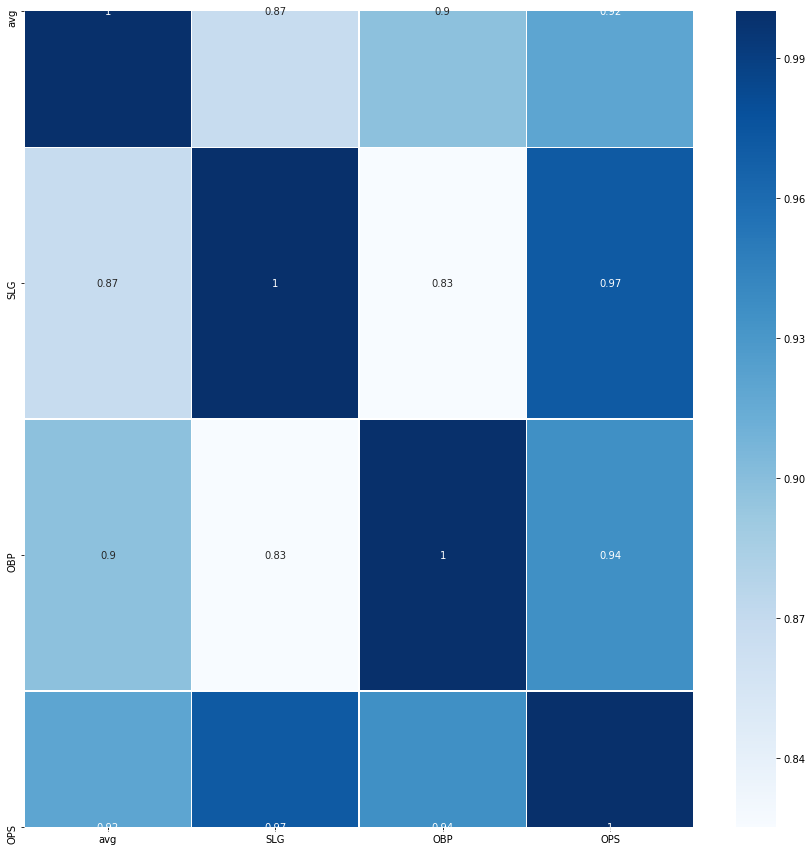

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(data = reg_float.corr(), annot=True, linewidths=.5, cmap="Blues")
#annot : 숫자표시를 할껀지 말껀지 

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression

In [12]:
reg_int = reg[['G', 'AB', 'R', 'H',"HR", 'TB','RBI', 'SB', 'CS','BB','HBP','SO',
'GDP','E']]

In [13]:
reg_int

,G,AB,R,H,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,E
0,50,183,27,62,8,95,34,5,0,9,8,25,3,9
1,2,1,0,0,0,0,0,0,0,0,0,1,0,1
2,41,86,11,19,1,30,7,0,0,13,2,28,1,6
3,120,311,50,80,2,101,27,4,3,40,5,58,3,15
4,46,101,16,16,1,26,7,0,0,8,2,30,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,5,5,0,0,0,0,0,0,0,0,0,1,0,0
2450,2,2,0,0,0,0,0,0,0,0,0,0,0,0
2451,11,10,2,0,0,0,0,0,1,0,0,5,0,0
2452,60,117,18,34,1,47,16,4,0,10,3,38,2,4


In [14]:
reg_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 14 columns):
G      2454 non-null int64
AB     2454 non-null int64
R      2454 non-null int64
H      2454 non-null int64
HR     2454 non-null int64
TB     2454 non-null int64
RBI    2454 non-null int64
SB     2454 non-null int64
CS     2454 non-null int64
BB     2454 non-null int64
HBP    2454 non-null int64
SO     2454 non-null int64
GDP    2454 non-null int64
E      2454 non-null int64
dtypes: int64(14)
memory usage: 268.5 KB


In [15]:
reg_int.isnull().sum()
#결측값이 없는 완벽한 모델 

G      0
AB     0
R      0
H      0
HR     0
TB     0
RBI    0
SB     0
CS     0
BB     0
HBP    0
SO     0
GDP    0
E      0
dtype: int64

### 랜덤포레스트해보기 ###

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [18]:
y= reg_float["OPS"]
x= reg_float.drop("OPS", axis =1)
#진짜 중요 반응변수를 제외하고 설명변수에 넣고 싶을때 drop을 이용해서

In [19]:
x.head()

,avg,SLG,OBP
0,0.339,0.519,0.383
1,0.000,0.000,0.000
2,0.221,0.349,0.337
3,0.257,0.325,0.348
4,0.158,0.257,0.232


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=10)
#검증데이터 20% 학습데이터 80%로 분리 

In [21]:
rf = RandomForestClassifier(random_state =0)
rf.fit(x_train, y_train)
#실수형은 안되는거같다 

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [29]:
y= reg_int["G"]
x= reg_int.drop("G", axis =1)

In [37]:
reg_int.isnull().sum() > 0

G      False
AB     False
R      False
H      False
HR     False
TB     False
RBI    False
SB     False
CS     False
BB     False
HBP    False
SO     False
GDP    False
E      False
dtype: bool

In [38]:
reg_int[reg_int==np.inf]=np.nan
reg_int.fillna(reg_int.mean(), inplace=True)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydat

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=10)
#검증데이터 20% 학습데이터 80%로 분리 

In [40]:
rf = RandomForestClassifier(random_state =0)
rf.fit(x_train, y_train)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
pred = rf.predict(x_test)
print('정확도 : {0:.3f}'.format(accuracy_score(y_test,pred)))
#여기서 랜덤포레스트의 하이퍼 파라미터를 지정해주면 모델의 성능이 달라질 수 있음


정확도 : 0.055


In [42]:
#n_estimator : 결정 트리의 개수 많으면 좋은 성능이 나오지만 무조건은 아님
#max_features : 데이터의 feature를 참조할 개수 기본값은 자동
#max_depth : 트리의 깊이 
#min_smaples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터수 
#min_samples_split : 노드를 분할하기 위한 최소한의 데이터수
#배깅 : 붓스트랩의 줄임말 
#붓스트랩 : 데이터를 몇개의 데이터로 나누고 나눈 데이터들에서 모형을 생성하여 나중에 모형들을 결합하여 최종 모형을 만드는것
#랜덤포레스트는 목표변수가 yes or no이어만 되는걸까???

In [43]:
rf_param_grid = {'n_stimators ' : [100],
                 'max_depth' : [8],
                 'min_samples_leaf' : [3,5,7,10],
                 'min_samples_split' : [2,3,5,10]
                }

In [44]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, scoring = 'accuracy', n_jobs = -1, verbose =1)
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter n_stimators  for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [28]:
print('최고 평균 정확도 : {0:.4f}'.format(rf_grid.best_score_))
print('최고의 파라미터 :' , rf_grid_best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'